In [1]:
# Goal: Explore the NLTE rate equation around the u_2 state of oxygen
import sys, os
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds

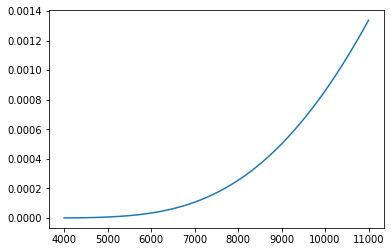

In [2]:
# first lets look at LTE.. how does the relative population change over temperature
temp = np.linspace(4000, 11000)
g_u2 = 1
g_g = 9
E_2 = 48620 # K
n_2 = g_u2/g_g * np.exp(-E_2/temp)
plt.plot(temp, n_2)

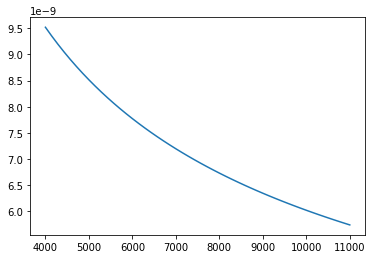

In [3]:
Y_5577 = 0.07
Q_5577 = 8.6e-6 * temp**(-1/2) / g_u2 * Y_5577
plt.plot(temp, Q_5577)

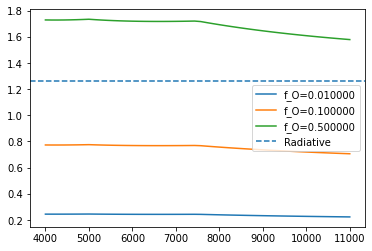

In [4]:
Y_5577 = 0.07
Q_5577 = 8.6e-6 * temp**(-1/2) / g_u2 * Y_5577

fone_temp = np.array([2500, 5000, 7500, 12000])
fone = np.array([2.1e8, 2.88e8, 3.5e8, 4e8])
fone_interp = np.interp(temp, fone_temp, fone)

for f_o in [0.01, 0.1, 0.5]:
    n_e = fone_interp*np.sqrt(f_o)
    C = Q_5577*n_e
    plt.plot(temp, C, label='f_O=%f' % f_o)
plt.axhline(1.26, label='Radiative', ls='--')
plt.legend()

In [5]:
# if C >> A -> we are in LTE
# so this means if f_O is 0.5..1 we are pretty much in LTE territory

# but also interesting that it seems like that C(T) is fairly flat over temp (with shitty estimates all over
# the place)

# Next we should just try to calculate the NLTE deviation as a function of temperature maybe?

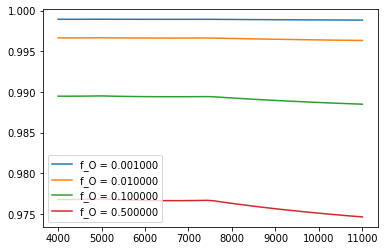

In [6]:
def nu1_calc_lte(temp):
    g_u1 = 5
    g_g = 9
    E_1 = 22830 # K
    return g_u1/g_g * np.exp(-E_1/temp)

# simple estimate just solving eqn48 in J+Handbook to N_u
def nu2_estimate0(temp, ne):
    Q_2g = 8.631e-6/temp**0.5 * 1 / 1 * ne
    Q_21 = 8.631e-6/temp**0.5 * 0.07 / 1 * ne
    E_u2 = 48620 # K
    E_u1 = 22830 # K
    A_21 = 1.26
    N_1 = nu1_calc_lte(temp)
    el1 = Q_2g*np.exp(-E_u2/temp)*1/9 + N_1*Q_21*np.exp(-(E_u2-E_u1)/temp)*1/5
    el2 = A_21 + Q_21 + Q_2g
    return el1/el2

def nu2_calc_lte(temp):
    g_u2 = 1
    g_g = 9
    E_2 = 48620 # K
    return g_u2/g_g * np.exp(-E_2/temp)

temp = np.linspace(4000, 11e3)

fone_temp = np.array([2500, 5000, 7500, 12000])
fone = np.array([2.1e8, 2.88e8, 3.5e8, 4e8])
fone_interp = np.interp(temp, fone_temp, fone)

for f_o in [0.001, 0.01, 0.1, 0.5]:
    n_e = fone_interp/np.sqrt(f_o)

    nu2 = nu2_estimate0(temp, n_e)
    nu2_lte = nu2_calc_lte(temp)
    plt.plot(temp, nu2/nu2_lte, label='f_O = %f' % f_o)
plt.legend()